In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import utils as ut

import matplotlib.pylab as pylab

params = {'axes.titlesize': 12,
          'font.size': 12}
pylab.rcParams.update(params)

In [2]:
bench_all = pd.read_csv('./results/sim/joint_benchmarks.csv', index_col=0)
bench_all['id'] = bench_all.apply(lambda x: x['id'].upper(), axis=1)

df_card = pd.read_csv('./results/hparam_card.csv')
df_card['id'] = df_card.apply(lambda x: x['id'].upper(), axis=1)

bench_all = bench_all.merge(df_card, on='id')

/home/damian/miniconda3/envs/tf-gpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (24,26,27,28,29,33,34,39,41,42,43,44,45,47,48,57,58,59,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
def get_best_worst(df, metric):
    df_best = ut.best_h(df, metric)
    df_worst = ut.worst_h(df, metric)
    df_best['quality'] = 'best'
    df_worst['quality'] = 'worst'

    df_final = pd.concat([df_best, df_worst], axis=0)
    df_final = df_final.reset_index()

    return df_final

In [4]:
df_shd = get_best_worst(bench_all, 'SHD_pattern')
df_fp = get_best_worst(bench_all, 'FP_skel')
df_fn = get_best_worst(bench_all, 'FN_skel')

## Plots

### SHD, FP, FN (p=10, d=1)

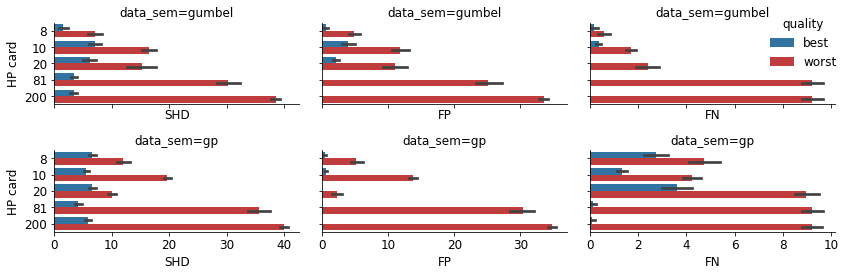

In [8]:
fig, axs = plt.subplots(2, 3, sharex='col', sharey=True, figsize=(12, 4))
axs = axs.flatten()

my_pal = ['C0', 'C3']

sem = 'gumbel'
ax = axs[0]
df_case = df_shd.loc[(df_shd['graph_p'] == 10) & (df_shd['data_sem'] == sem) & (df_shd['graph_d'] == 1)]
g = sns.barplot(data=df_case, y='h_card', x='SHD_pattern', hue='quality', orient='h', ax=ax, palette=my_pal)
ax.set_title(f'data_sem={sem}')
ax.set_xlabel('SHD')
ax.set_ylabel('HP card')
ax.get_legend().remove()
ax.spines[['right', 'top']].set_visible(False)

ax = axs[1]
df_case = df_fp.loc[(df_fp['graph_p'] == 10) & (df_fp['data_sem'] == sem) & (df_fp['graph_d'] == 1)]
g = sns.barplot(data=df_case, y='h_card', x='FP_skel', hue='quality', orient='h', ax=ax, palette=my_pal)
ax.set_title(f'data_sem={sem}')
ax.set_xlabel('FP')
ax.set_ylabel('')
ax.get_legend().remove()
ax.spines[['right', 'top']].set_visible(False)

ax = axs[2]
df_case = df_fn.loc[(df_fn['graph_p'] == 10) & (df_fn['data_sem'] == sem) & (df_fn['graph_d'] == 1)]
g = sns.barplot(data=df_case, y='h_card', x='FN_skel', hue='quality', orient='h', ax=ax, palette=my_pal)
ax.set_title(f'data_sem={sem}')
ax.set_xlabel('FN')
ax.set_ylabel('')
sns.move_legend(ax, loc='center right', bbox_to_anchor=(1.05, 0.75), frameon=False)
ax.spines[['right', 'top']].set_visible(False)

sem = 'gp'
ax = axs[3]
df_case = df_shd.loc[(df_shd['graph_p'] == 10) & (df_shd['data_sem'] == sem) & (df_shd['graph_d'] == 1)]
g = sns.barplot(data=df_case, y='h_card', x='SHD_pattern', hue='quality', orient='h', ax=ax, palette=my_pal)
ax.set_title(f'data_sem={sem}')
ax.set_xlabel('SHD')
ax.set_ylabel('HP card')
ax.get_legend().remove()
ax.spines[['right', 'top']].set_visible(False)

ax = axs[4]
df_case = df_fp.loc[(df_fp['graph_p'] == 10) & (df_fp['data_sem'] == sem) & (df_fp['graph_d'] == 1)]
g = sns.barplot(data=df_case, y='h_card', x='FP_skel', hue='quality', orient='h', ax=ax, palette=my_pal)
ax.set_title(f'data_sem={sem}')
ax.set_xlabel('FP')
ax.set_ylabel('')
ax.get_legend().remove()
ax.spines[['right', 'top']].set_visible(False)

ax = axs[5]
df_case = df_fn.loc[(df_fn['graph_p'] == 10) & (df_fn['data_sem'] == sem) & (df_fn['graph_d'] == 1)]
g = sns.barplot(data=df_case, y='h_card', x='FN_skel', hue='quality', orient='h', ax=ax, palette=my_pal)
ax.set_title(f'data_sem={sem}')
ax.set_xlabel('FN')
ax.set_ylabel('')
ax.get_legend().remove()
ax.spines[['right', 'top']].set_visible(False)

plt.tight_layout()
plt.savefig('./plots/card/card_all.pdf', dpi=1000)